In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint

In [2]:
def plot(array, label=None):
   """Plot a numpy array with a colorbar."""
   plt.imshow(array)
   plt.colorbar()
   if label is None:
       label = 'Raster {}'.format(array.shape)
   plt.title(label)
   plt.xlabel('Column #')
   plt.ylabel('Row #')

(1,)


Text(0,0.5,'Row #')

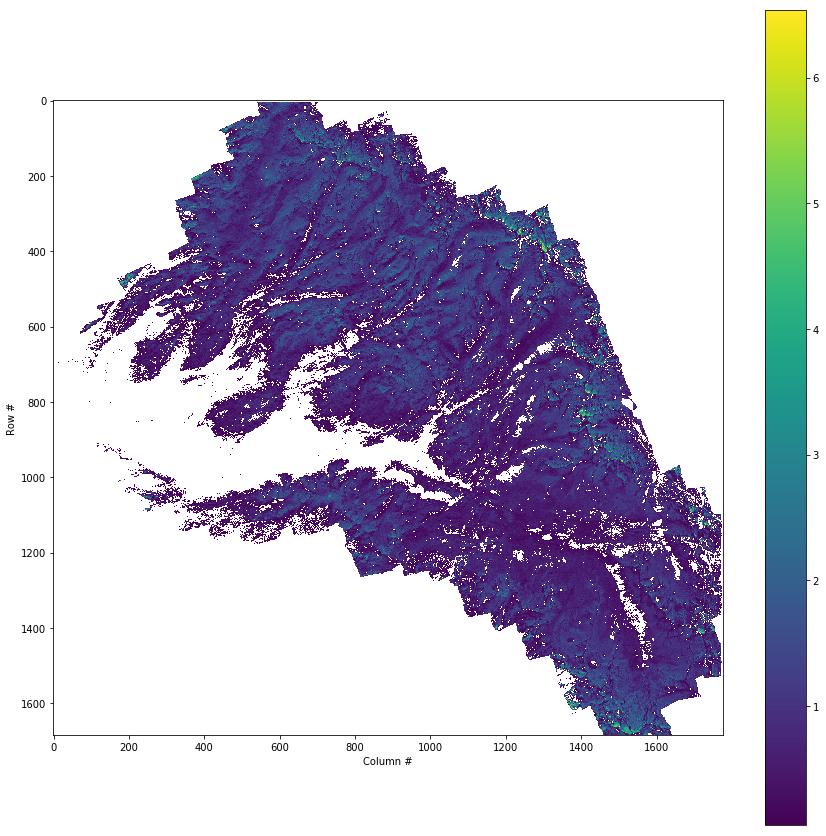

In [3]:
with rasterio.open('./ghw2018_snowmelt_data/TB20140323_SUPERsnow_depth.tif_mean30m.tif') as raster:
    #pprint.pprint(raster.profile)
    print(raster.indexes)
    snowdepth_data = raster.read(1)
    
plt.figure(figsize=(15,15))
plt.imshow(snowdepth_data)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0,0.5,'Row #')

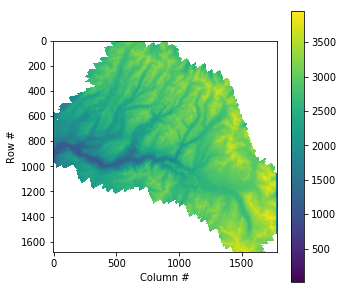

In [4]:
data = rasterio.open('./ghw2018_snowmelt_data/dem30m.tif')
dem = data.read(1)
    
plt.figure(figsize=(5,5))
plt.imshow(dem)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

In [5]:
data.width, data.height, data.bounds, data

(1777,
 1684,
 BoundingBox(left=254150.4675894332, bottom=4179300.9344607466, right=307460.46758943266, top=4229820.934460746),
 <open DatasetReader name='./ghw2018_snowmelt_data/dem30m.tif' mode='r'>)

In [ ]:
data.bounds

In [6]:
dem

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [7]:
mask = rasterio.open('./ghw2018_snowmelt_data/scene_30m_mask.tif')
mask_array=mask.read(1)
mask.width, mask.height, mask.bounds

(1777,
 1684,
 BoundingBox(left=254150.4675894332, bottom=4179300.9344607466, right=307460.46758943266, top=4229820.934460746))

In [ ]:
dem_masked = dem*mask_array
#plt.imshow(dem_masked)
#plt.imshow(mask_array)
plt.imshow(dem_masked)

In [8]:
type(dem)

numpy.ndarray

In [9]:
type(data)

rasterio.io.DatasetReader

CRS({'init': 'epsg:32611'})

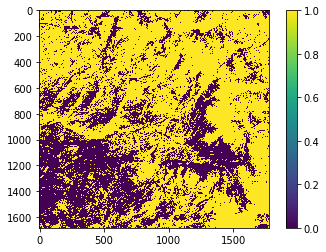

In [12]:
veg = rasterio.open('./ghw2018_snowmelt_data/veg_bin30res.tif')
veg_array=veg.read(1)
plt.imshow(veg_array)
plt.colorbar()
veg.crs

In [13]:
veg_array[veg_array == 0] = 2
veg_array[veg_array == 1] = 0
veg_array[veg_array == 2] = 1

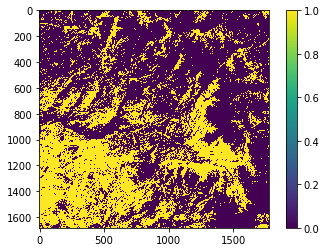

In [14]:
plt.imshow(veg_array)
plt.colorbar()

In [15]:
with rasterio.open("veg_bin30res.tif", 'w', driver='GTiff', height=veg_array.shape[0],
                       width=veg_array.shape[1], count=1, dtype=veg_array.dtype,
                       crs=veg.crs, transform=veg.transform) as dst:
    dst.write(veg_array, 1)

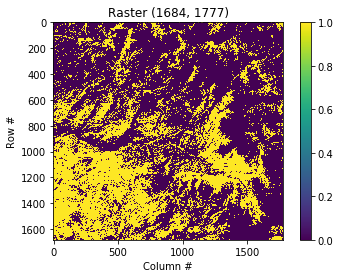

In [16]:
with rasterio.open("newfile.tif") as data:
    plot(data.read(1))

In [18]:
!dir # using exclamation point is basically like running a console

 Volume in drive C has no label.
 Volume Serial Number is F085-DA11

 Directory of C:\Users\clittlef\ghw2018_snowmelt

09/12/2018  01:57 PM    <DIR>          .
09/12/2018  01:57 PM    <DIR>          ..
09/11/2018  02:09 PM                12 .gitignore
09/12/2018  01:57 PM    <DIR>          .ipynb_checkpoints
09/12/2018  01:57 PM         1,446,350 delta_swe_processing_2017.ipynb
09/11/2018  01:37 PM               192 environment.yml
09/11/2018  02:06 PM    <DIR>          ghw2018_snowmelt_data
09/12/2018  01:41 PM           819,816 MY FIRST JUPYTER NOTEBOOK.ipynb
09/12/2018  01:40 PM        23,953,576 newfile.tif
09/11/2018  01:37 PM             3,062 README.md
09/12/2018  01:46 PM               555 Untitled.ipynb
               7 File(s)     26,223,563 bytes
               4 Dir(s)  28,251,652,096 bytes free
